# DL Project Update 1 Code

In [1]:
from pathlib import Path
import re
import matplotlib.pyplot as plt
import torch
import torch.nn
import torchvision
from torch.utils.data import Dataset
import torch.nn as nn
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from torchvision.transforms import ToPILImage
from IPython.display import HTML, display

In [2]:
# Creating a CustomDataset class which retrives the images and annotations.

class CustomDataset(Dataset):
    def __init__(self,path_of_image,path_of_maskedimage):
        super().__init__()
        images_path = Path(path_of_image)
        maskedimages_path = Path(path_of_maskedimage)
        self.images = [p for p in images_path.glob('*.jpg')]
        self.maskedimages = [p for p in maskedimages_path.glob('*.png')]
        self.transform1 = torchvision.transforms.Compose([torchvision.transforms.Resize((1080,1080)),
                                                         torchvision.transforms.Normalize((0.0,0.0,0.0),(255.,255.,255.))])
        self.transform2 = torchvision.transforms.Compose([torchvision.transforms.Resize((1080,1080)),
                                                         torchvision.transforms.Normalize((0.0),(255.))])
        
    def __len__(self):
        length = len(self.images)
        return length
    
    def __getitem__(self,index):
        img = torchvision.io.read_image(str(self.images[index]))
        masked_img = torchvision.io.read_image(str(self.maskedimages[index]))
        img = torch.tensor(img,dtype=torch.float)
        masked_img = torch.tensor(masked_img,dtype=torch.float)
        img = self.transform1(img)
        masked_img = self.transform2(masked_img)
        return img,masked_img

In [3]:
# Creating a tuple of Training, Validation and Testing Datasets.
d = (CustomDataset('Dataset_train_val_test/Images/train','Dataset_train_val_test/annotations/train'),CustomDataset('Dataset_train_val_test/Images/val','Dataset_train_val_test/annotations/val'),CustomDataset('Dataset_train_val_test/Images/test','Dataset_train_val_test/annotations/test'))

In [4]:
def print_with_font_size(text, font_size=5):
    display(HTML(f"<font size='{font_size}'>{text}</font>"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


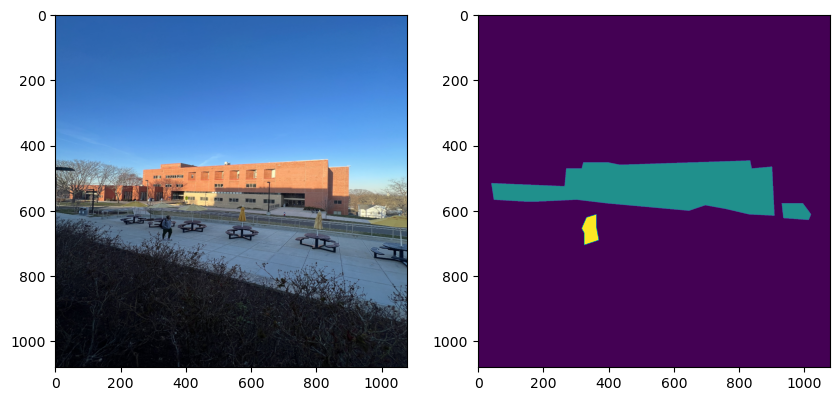

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


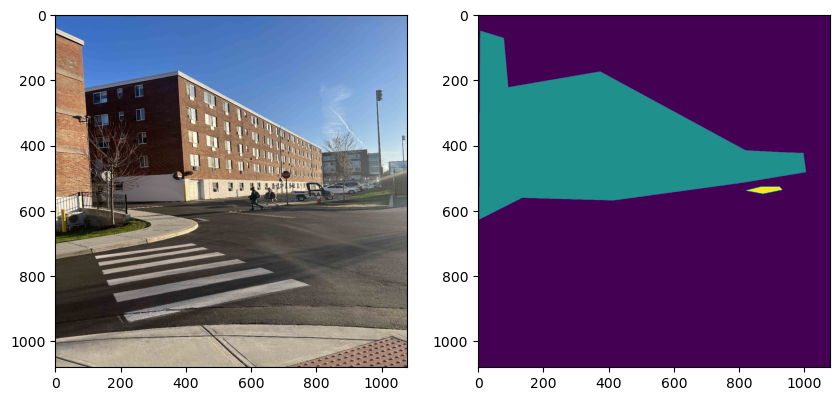

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


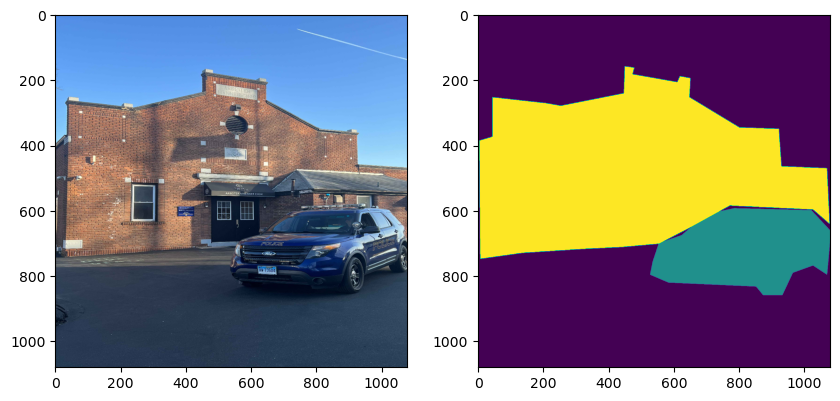

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


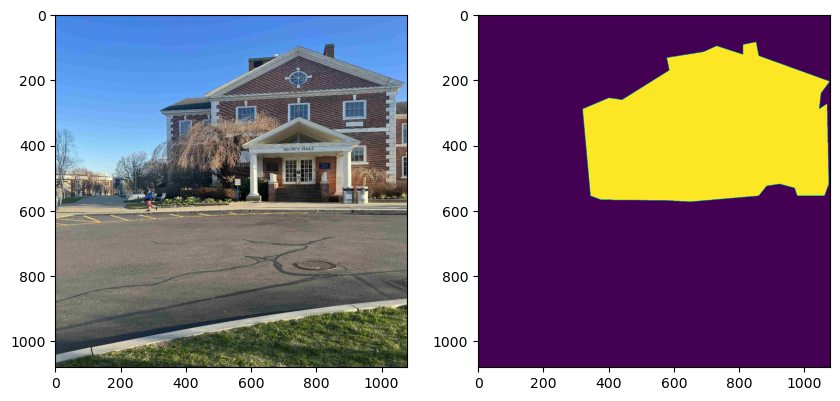

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


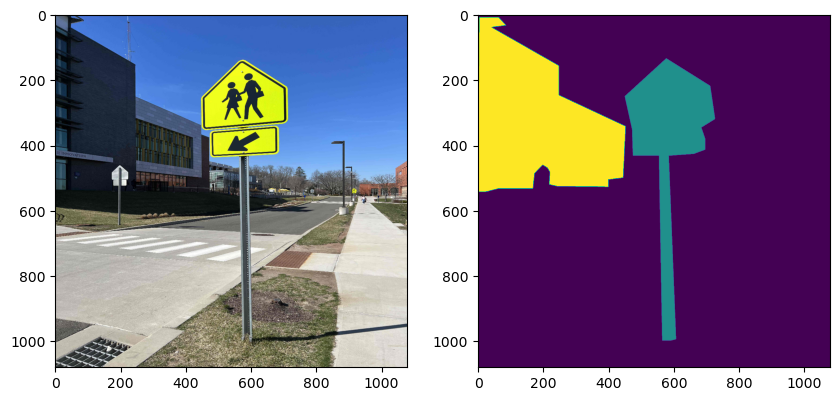

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


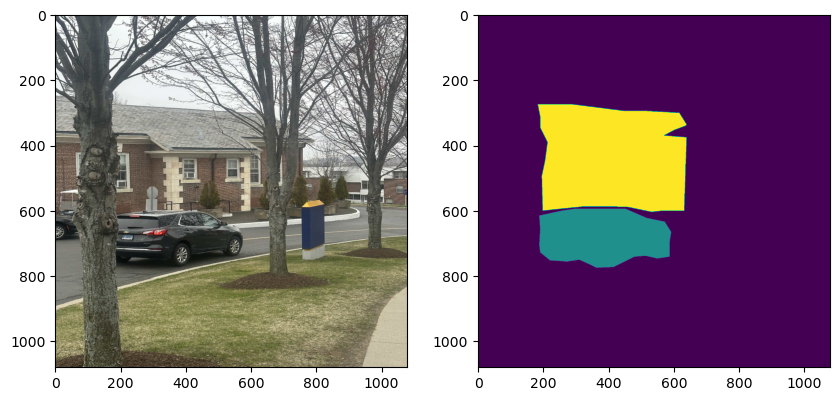

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


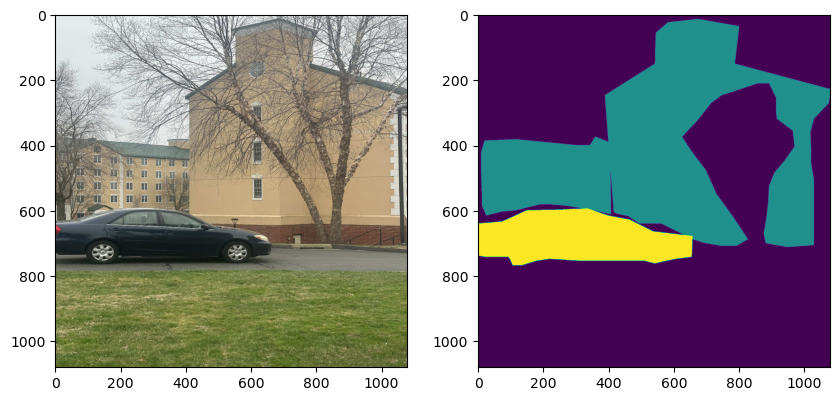

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


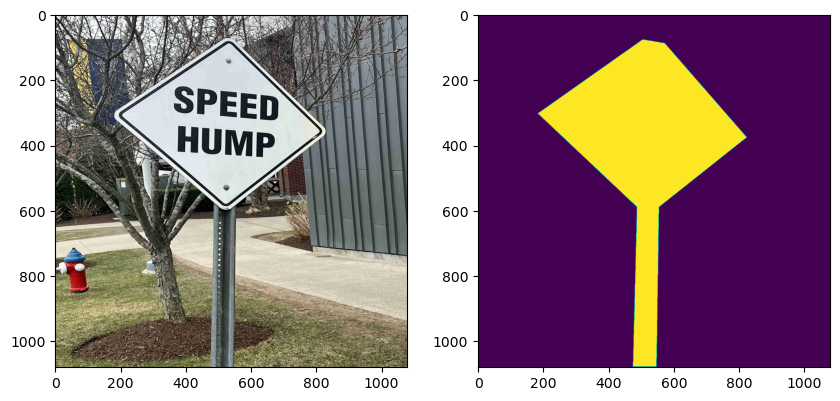

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


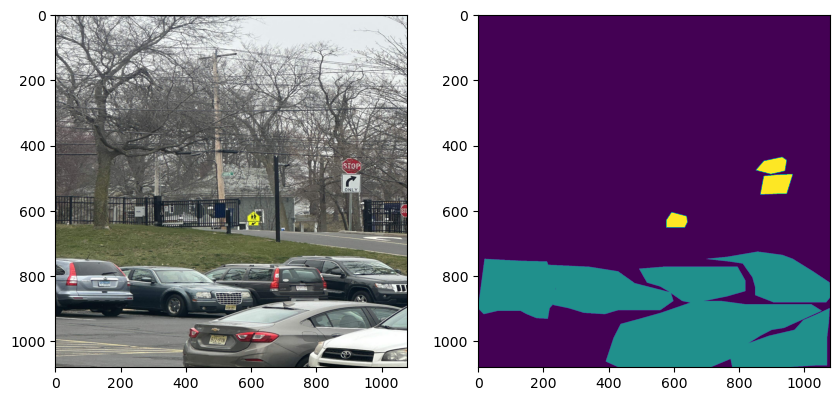

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


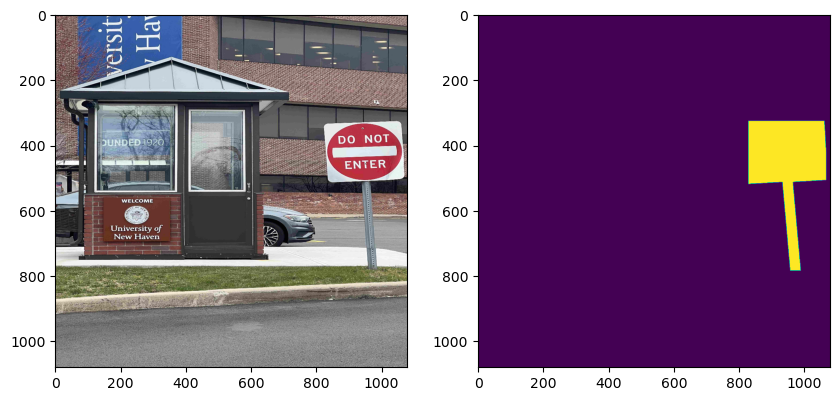

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


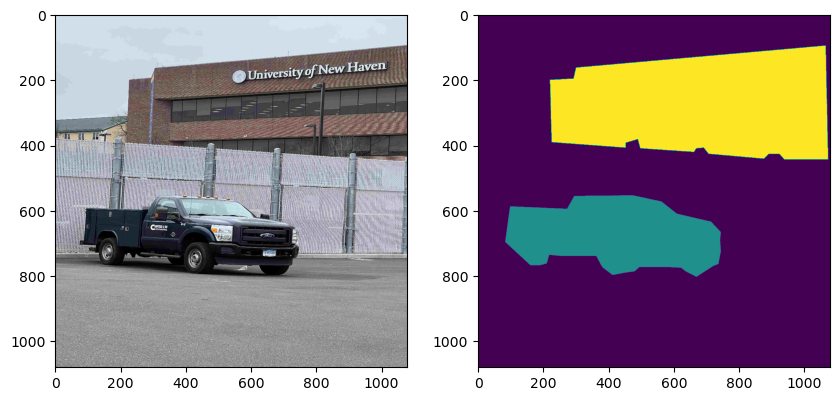

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


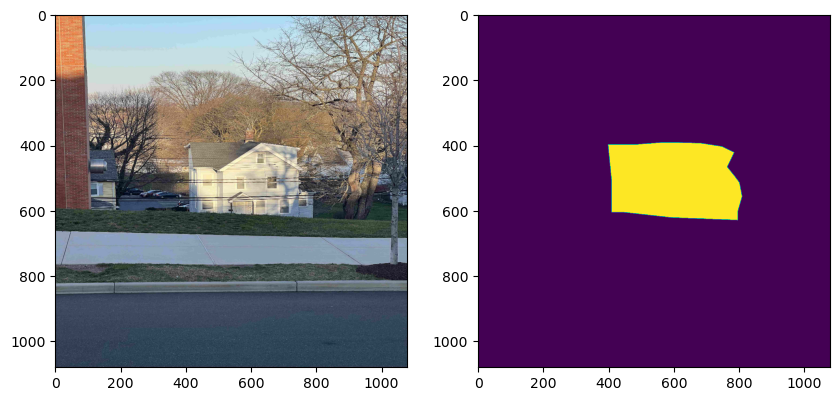

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


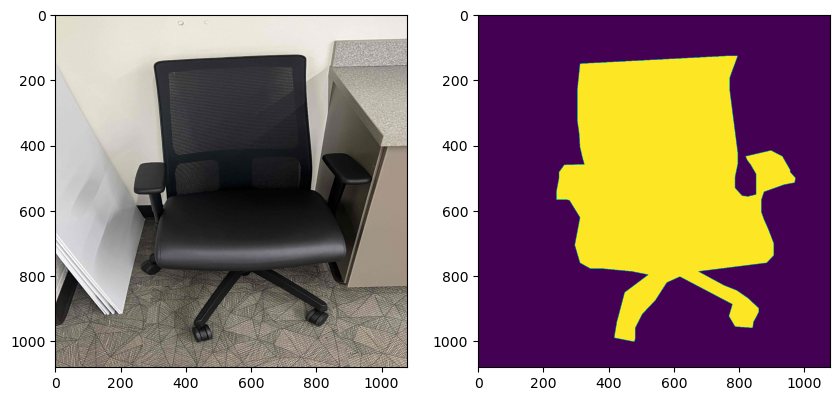

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


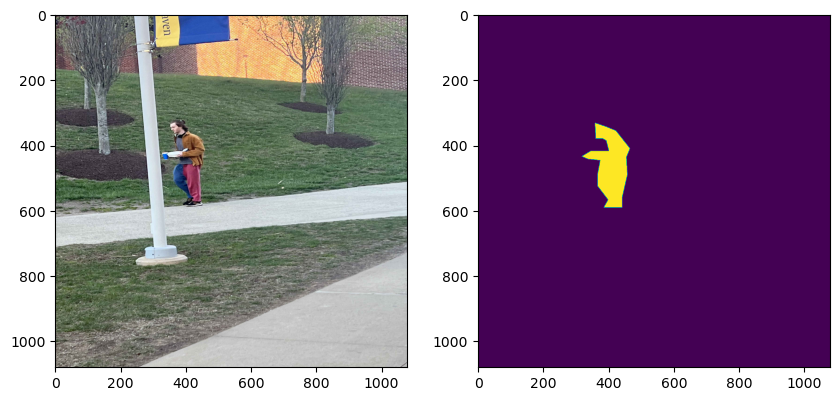

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


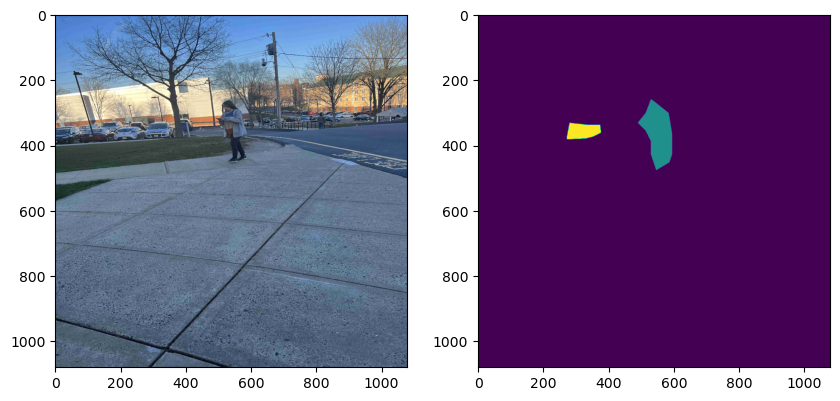

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


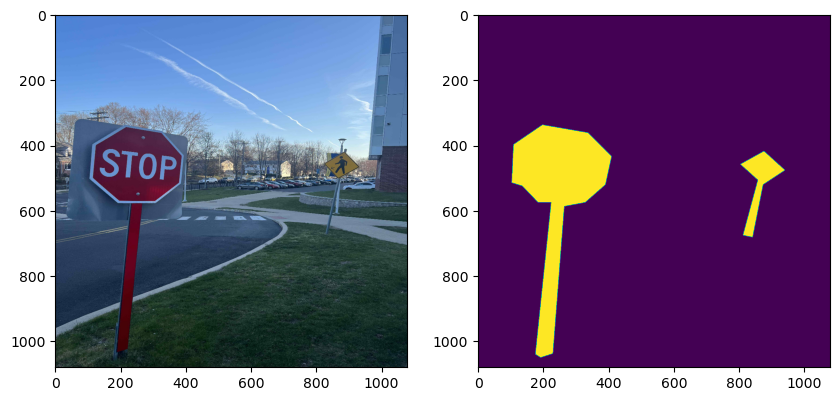

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


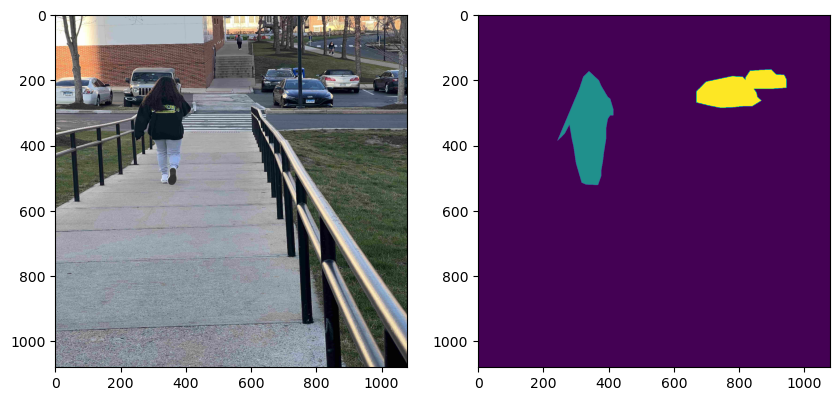

In [5]:
for i in range(0,3):
    dataset = d[i]
    train_dataloader = torch.utils.data.DataLoader(dataset,batch_size=8)
    if i == 0 :
        print_with_font_size("Images and Annotated Images of Training Images : ", font_size=6)
    elif i == 1 :
        print_with_font_size("Images and Annotated Images of Validation Images : ", font_size=6)
    else :
        print_with_font_size("Images and Annotated Images of Testing Images : ", font_size=6)
    for batch in train_dataloader:
        imgs,masked_imgs = batch
        img_np = imgs[0].permute([1,2,0]).numpy()
        maskedimage_np = masked_imgs[0].permute([1,2,0]).numpy()
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(img_np)
        ax2.imshow(maskedimage_np)
        plt.show()

In [2]:
!pip install dataset

     -------------------------------------- 212.9/212.9 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB ? eta 0:00:00


In [3]:

import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from dataset import CustomDataset


ImportError: cannot import name 'CustomDataset' from 'dataset' (C:\Users\Ganipineni\anaconda3\lib\site-packages\dataset\__init__.py)

In [ ]:

# Define the data directory and other parameters
data_dir = '/path/to/data/'
batch_size = 8
num_epochs = 1
learning_rate = 0.001



In [ ]:
data_transforms = transforms.Compose([
    transforms.ToTensor()
])

# Define the dataset and data loader
dataset = CustomDataset(data_dir, transform=data_transforms)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the ResNet-101 model with a new segmentation layer
model = torchvision.models.segmentation.fcn_resnet101(pretrained=True)
model.classifier = nn.Sequential(
    nn.Conv2d(2048, num_classes, kernel_size=1),
)

# Freeze the layers in the ResNet-101 model
for param in model.parameters():
    param.requires_grad = False

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for batch in dataloader:
        inputs = batch['image']
        masks = batch['mask']
        optimizer.zero_grad()
        outputs = model(inputs)['out']
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
